<a href="https://colab.research.google.com/github/Sarvesh1814/COVID-19-Detection/blob/main/COVID_19_AML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 Detection using X-Ray of Human's Thoracic Region by the means of CNN 

## Contributors 

|Name|Enrollment Number|
|--|--|
|Vipasha Vaghela|202211002|
|Bagwe Sarvesh|202211006|
|Vedant Dave|202211042|
|Hiren Thakkar| 202211074|

### Importing Drive 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset for the project 

In [2]:
paths = "/content/drive/MyDrive/COVID-19_Radiography_Dataset"

### Models used and their codes 

|Model|Code Link|
|--|--|
|Convolutional Neural Networks|https://colab.research.google.com/drive/1cg2U15Z6wh0SMgdKd2ImFOuyyAJXVUuu?usp=sharing|
|InceptionResNetV2|https://colab.research.google.com/drive/1CobkPBIOLu5hhZme8QM4zLw4e6zknI5K?usp=sharing|
|MobileNetV2|https://colab.research.google.com/drive/1H11wbU5MQWeA6gwQOaNzki0E6RuA_iqv?usp=sharing|
|ResNet50V2|https://colab.research.google.com/drive/1URvIeBZYiPSmJf0tiRG72MNON6ltzGJI?usp=sharing|
|VGG19|https://colab.research.google.com/drive/1_TIIisEM24onCYJKbcRw9ANbyx06LcRk?usp=sharing|
|XceptionNet|https://colab.research.google.com/drive/1_VVF2g4J5jm2d0MAlVFKgQ6Ccl_NLOIg?usp=sharing|
|ResNet100V2|https://colab.research.google.com/drive/1joCwMWtvNL9eYIHsN8zfblrEt_S2IkoJ?usp=sharing|
|Artificial Neural Network|https://colab.research.google.com/drive/1jhKzMn9cKorOAQmCKvjJB7bfzfLHX4WV?usp=sharing|
|AlexNet|https://colab.research.google.com/drive/1CkHWGkMrxWH4FzDvqtAKWh3Bjng63D1M?usp=sharing|

**Click on the link to know more about the training of model**

### Information about **Convolutional Neural Network Model** for the given task

**Model: "sequential"**


---


|Layer (type)|Output Shape|Param # |  
|--|--|--|
|conv2d (Conv2D)|              (None, 218, 218, 32)|      896       |
| max_pooling2d (MaxPooling2D)|(None, 109, 109, 32)|0| 
| conv2d_1 (Conv2D)|            (None, 107, 107, 64) |     18496     |
| max_pooling2d_1 (MaxPooling2D)| (None, 53, 53, 64)|        0 |        
|conv2d_2 (Conv2D)           | (None, 51, 51, 128)     |  73856   |  
| max_pooling2d_2 (MaxPooling2D) | (None, 25, 25, 128)     |  0       |  
| conv2d_3 (Conv2D)           | (None, 23, 23, 256)    |   295168   | 
| max_pooling2d_3 (MaxPooling2D) | (None, 11, 11, 256)   |    0         |
|flatten (Flatten)           | (None, 30976)        |     0         |
|dense (Dense)               | (None, 512)         |      15860224  |
| dropout (Dropout)           | (None, 512)        |       0         |
|dense_1 (Dense)             | (None, 256)       |        131328    |
|dropout_1 (Dropout)         | (None, 256)      |         0         |
|dense_2 (Dense)             | (None, 2)       |          514       |
                                                                 
---
Total params: 16,334,482

Trainable params: 16,334,482

Non-trainable params: 0
_________________________________________________________________


**Number of parameters is given by:** 

**For Conv2D:**

filters x (kernel_size x kernel_size x input_channels + 1)

**For Dense layers:**

units x (input_shape + 1)


**This is a valid convolution as it has taken no padding and the size of the output feature map is less than the original feature space**

### Importing Libraries 

In [3]:
import numpy as np
import pandas as pd
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
import glob
import matplotlib.pyplot as plt
import cv2

from PIL import Image 
import io

from tensorflow import keras
from IPython.display import display

from google.colab import files
from keras.preprocessing import image 
from keras.utils import img_to_array

### Model Requirements

|Model|Image Input Requirement|
|--|--|
|Convolutional Neural Netwroks|(220,220)|
|InceptionResNetV2|(299,299)|
|MobileNetV2|(220,220)|
|ResNet50V2|(220,220)|
|VGG19|(224,224)|
|ResNet100V2|(220,220)|
|XceptionNet|(220,220)|

### Contributions

|Model|Contributor|
|--|--|
|MobileNetV2|Vipasha Vaghela|
|VGG19|Vipasha Vaghela|
|Convolutional Neural Netwroks| Bagwe Sarvesh|
|InceptionResNetV2|Bagwe Sarvesh|
|ResNet50V2|Bagwe Sarvesh|
|Artificial Neural Network|Vedant Dave|
|XceptionNet|Vedant Dave|
|ResNet100V2|Hiren Thakkar|
|AlexNet|Hiren Thakkar|

### Comparing Models' Performance

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histories(names_list, npy_files_list):
    # Load histories from .npy files
    histories = []
    for filename in npy_files_list:
        history = np.load(filename, allow_pickle=True).item()
        histories.append(history)

    # Find the maximum number of epochs across all models
    max_epochs = max([len(history['accuracy']) for history in histories])

    # Plot training accuracy for all models
    fig, ax = plt.subplots()
    for i in range(len(histories)):
        history = histories[i]
        ax.plot(np.arange(len(history['accuracy'])), history['accuracy'], label=names_list[i])
    ax.set_title('Training Accuracy')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.set_xlim([0, 15])
    ax.legend()
    plt.show()

    # Plot validation accuracy for all models
    fig, ax = plt.subplots()
    for i in range(len(histories)):
        history = histories[i]
        ax.plot(np.arange(len(history['val_accuracy'])), history['val_accuracy'], label=names_list[i])
    ax.set_title('Validation Accuracy')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.set_xlim([0, 15])
    ax.legend()
    plt.show()

    # Plot training loss for all models
    fig, ax = plt.subplots()
    for i in range(len(histories)):
        history = histories[i]
        ax.plot(np.arange(len(history['loss'])), history['loss'], label=names_list[i])
    ax.set_title('Training Loss')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_xlim([0, 15])
    ax.legend()
    plt.show()

    # Plot validation loss for all models
    fig, ax = plt.subplots()
    for i in range(len(histories)):
        history = histories[i]
        ax.plot(np.arange(len(history['val_loss'])), history['val_loss'], label=names_list[i])
    ax.set_title('Validation Loss')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_xlim([0, 15])
    ax.legend()
    plt.show()


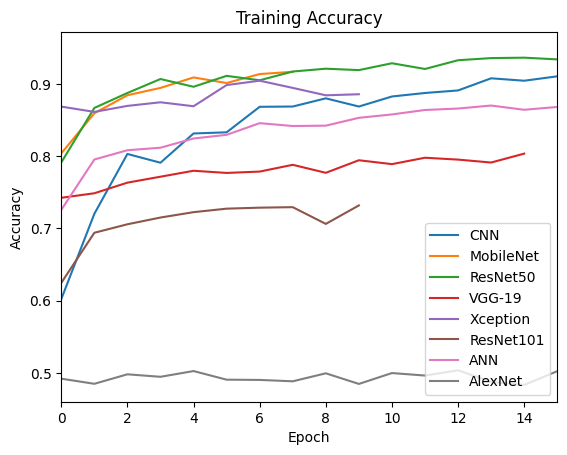

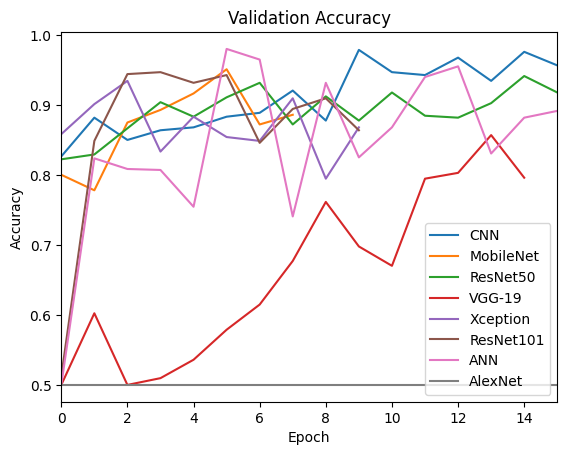

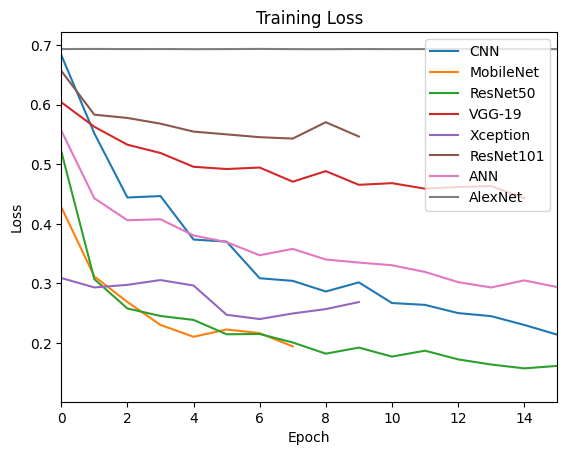

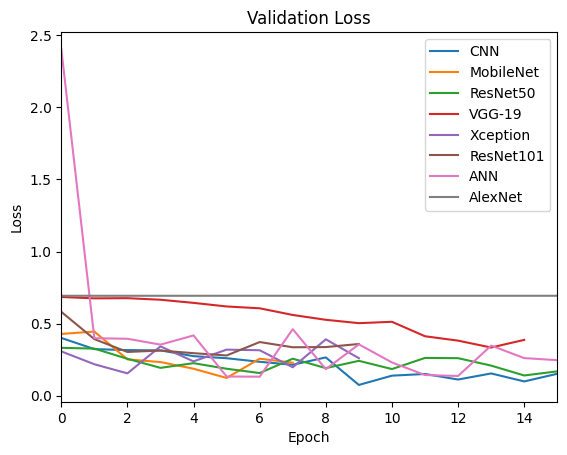

In [5]:
names_list =["CNN","MobileNet","ResNet50","VGG-19",'Xception',"ResNet101","ANN","AlexNet"] 
npy_files_list=["/content/drive/MyDrive/AML weights/CNN-history.npy",
                "/content/drive/MyDrive/AML weights/MobileNet_history.npy",
                "/content/drive/MyDrive/AML weights/ResNet50V2-history1.npy",
                "/content/drive/MyDrive/AML weights/VGG19-history.npy",
                "/content/drive/MyDrive/AML weights/history_xception.npy",
                "/content/drive/MyDrive/AML weights/RestNet101 (1).npy",
                "/content/drive/MyDrive/AML weights/ANN_history .npy"
                ,"/content/drive/MyDrive/AML weights/AlexNet.npy"
                ]
plot_histories(names_list, npy_files_list)

**This type of graph is due to different convergence of model at different no of epoch (EarlyStopping)**

### Working Demo of Models 

In [11]:
dct={1: "ResNet50V2",2:'VGG-19',3:"MobileNet",4:"ResNet101",5:'XceptionNet',6:'InceptionResNet',7:'CNN',8:'ANN',9:'AlexNet'}

models=["/content/drive/MyDrive/AML weights/ResNet50V2.h5",
        "/content/drive/MyDrive/AML weights/VGG19-Model.h5",
        "/content/drive/MyDrive/AML weights/MobileNet_v2_3.h5",
        "/content/drive/MyDrive/AML weights/RestNet101.h5",
        "/content/drive/MyDrive/AML weights/Xception_model (1).h5",
        "/content/drive/MyDrive/AML weights/InceptionResNet.h5",
        "/content/drive/MyDrive/AML weights/CNN.h5",
        "/content/drive/MyDrive/AML weights/ANN_model1.h5",
        "/content/drive/MyDrive/AML weights/AlexNet.h5"
        ]

Saving download.png to download (3).png

 Input the number to select the model using the printed list 



,Key,Model
0,1,ResNet50V2
1,2,VGG-19
2,3,MobileNet
3,4,ResNet101
4,5,XceptionNet
5,6,InceptionResNet
6,7,CNN
7,8,ANN
8,9,AlexNet



 Give Model No to use:7
1/1 [==============================] - 1s 1s/step

 COVID-19 Detected 



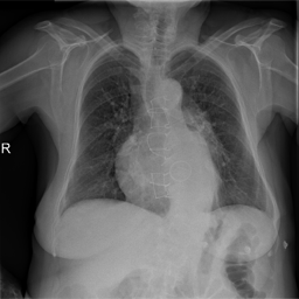

In [12]:
uploaded =files.upload()
print("\n Input the number to select the model using the printed list \n")
lst = list(dct.items())
df = pd.DataFrame(lst, columns=['Key', 'Model'])
display(df)

jj=int(input("\n Give Model No to use:"))
model = keras.models.load_model(models[jj-1])



for fn in uploaded.keys():
  path = '/content/'+ fn
  img=tf.keras.utils.load_img(path,target_size=(220,220))
  X = img_to_array(img)
  x=img_to_array(img)
  x /=255
  x= np.expand_dims(x,axis=0)

  images = np.vstack([x])
  
  classes = model.predict(images,batch_size=10)
  for i in range(len(classes)):
    if classes[i][0]>classes[i][1]:
      print("\n COVID-19 Detected \n")
    else:
      print("\n COVID-19 Not Detected \n")
  img = Image.open(path)
  display(img)
